# Import libraries

In [308]:
%matplotlib inline
import torch as th
import torch.nn.functional as F
import torch.nn as nn 
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split,  RandomizedSearchCV, PredefinedSplit
from sklearn.metrics import mean_squared_error, r2_score, mean_poisson_deviance, d2_tweedie_score, make_scorer, auc
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from skorch import NeuralNetRegressor, NeuralNet, callbacks
import utils
import architecture

# Load Models

Get number of units from neural network

In [309]:
all_results_df = pd.read_csv('../results/all_results.csv')
all_results_df 

,params_key,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_module__num_units_2,param_module__num_units_1,param_batch_size,params,split0_test_score,...,test_mean_poisson_deviance,test_weighted_mean_poisson_deviance,test_pde,test_weighted_pde,test_r^2,test_gini,test_min_pred,test_max_pred,test_mean_pred,test_var_pred
0,40_60_10000,12.871186,0.0,0.059068,0.0,40,60,10000,"{'module__num_units_2': 40, 'module__num_units...",0.019332,...,0.308171,0.353807,0.035162,0.026642,0.012748,0.211936,0.011499,0.605958,0.061833,0.000908
1,20_20_100,8.199776,0.0,0.026752,0.0,20,20,100,"{'module__num_units_2': 20, 'module__num_units...",0.018870,...,0.308171,0.353807,0.035162,0.026642,0.012748,0.211936,0.011499,0.605958,0.061833,0.000908
2,40_40_100,8.101505,0.0,0.026637,0.0,40,40,100,"{'module__num_units_2': 40, 'module__num_units...",0.018019,...,0.308171,0.353807,0.035162,0.026642,0.012748,0.211936,0.011499,0.605958,0.061833,0.000908
3,60_20_100,4.659447,0.0,0.025836,0.0,60,20,100,"{'module__num_units_2': 60, 'module__num_units...",0.017044,...,0.308171,0.353807,0.035162,0.026642,0.012748,0.211936,0.011499,0.605958,0.061833,0.000908
4,80_60_1000,5.418833,0.0,0.023512,0.0,80,60,1000,"{'module__num_units_2': 80, 'module__num_units...",0.016493,...,0.308171,0.353807,0.035162,0.026642,0.012748,0.211936,0.011499,0.605958,0.061833,0.000908
5,80_80_100,4.388946,0.0,0.029374,0.0,80,80,100,"{'module__num_units_2': 80, 'module__num_units...",0.015791,...,0.308171,0.353807,0.035162,0.026642,0.012748,0.211936,0.011499,0.605958,0.061833,0.000908
6,20_40_100,21.776228,0.0,0.071194,0.0,20,40,100,"{'module__num_units_2': 20, 'module__num_units...",0.015711,...,0.308171,0.353807,0.035162,0.026642,0.012748,0.211936,0.011499,0.605958,0.061833,0.000908
7,60_20_1000,3.798756,0.0,0.022246,0.0,60,20,1000,"{'module__num_units_2': 60, 'module__num_units...",0.015532,...,0.308171,0.353807,0.035162,0.026642,0.012748,0.211936,0.011499,0.605958,0.061833,0.000908
8,60_20_10000,12.239746,0.0,0.022882,0.0,60,20,10000,"{'module__num_units_2': 60, 'module__num_units...",0.015156,...,0.308171,0.353807,0.035162,0.026642,0.012748,0.211936,0.011499,0.605958,0.061833,0.000908
9,20_80_100,5.436774,0.0,0.029371,0.0,20,80,100,"{'module__num_units_2': 20, 'module__num_units...",0.015085,...,0.308171,0.353807,0.035162,0.026642,0.012748,0.211936,0.011499,0.605958,0.061833,0.000908


Filter to just best hyperparameters

In [310]:
top_results_df = all_results_df.loc[all_results_df['rank_test_score']==1]
top_results_df

,params_key,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_module__num_units_2,param_module__num_units_1,param_batch_size,params,split0_test_score,...,test_mean_poisson_deviance,test_weighted_mean_poisson_deviance,test_pde,test_weighted_pde,test_r^2,test_gini,test_min_pred,test_max_pred,test_mean_pred,test_var_pred
0,40_60_10000,12.871186,0.0,0.059068,0.0,40,60,10000,"{'module__num_units_2': 40, 'module__num_units...",0.019332,...,0.308171,0.353807,0.035162,0.026642,0.012748,0.211936,0.011499,0.605958,0.061833,0.000908


In [311]:
top_results_df[['agent', 'param_module__num_units_1', 'param_module__num_units_2']]

,agent,param_module__num_units_1,param_module__num_units_2
0,7,60,40


Create dictionary to lookup hyperparameters

In [312]:
top_results_dict = top_results_df[['agent', 'param_module__num_units_1', 'param_module__num_units_2']].set_index('agent').to_dict('index')
top_results_dict

{7: {'param_module__num_units_1': 60, 'param_module__num_units_2': 40}}

Use dictionary to access results, for example to lookup `agent=0`:

In [313]:
top_results_dict[0]

KeyError: 0

In [ ]:
list(top_results_dict[0].items())[0][1]

20

In [ ]:
list(top_results_dict[0].items())[1][1]

80

## Create load model function

In [ ]:
def load_model(agent=-1, num_features=39, num_units_1=100, num_units_2=20):

    num_units_1 = list(top_results_dict[agent].items())[0][1]
    num_units_2 = list(top_results_dict[agent].items())[1][1]

    loaded_agent_model = NeuralNetRegressor(architecture.MultipleRegression(num_features, num_units_1, num_units_2).double())
    loaded_agent_model.initialize()  # This is important!
    loaded_agent_model.load_params(f_params=f'../ag_'+str(agent)+'/agent_'+str(agent)+'_model.pkl', 
                                       f_optimizer=f'../ag_'+str(agent)+'/agent_'+str(agent)+'_opt.pkl', 
                                       f_history=f'../ag_'+str(agent)+'/agent_'+str(agent)+'_history.json')
    
    return loaded_agent_model

## Loop through

In [ ]:
NUM_AGENTS = 10

In [ ]:
agent_model_dictionary = {}
for agents in range(NUM_AGENTS):
    agent_model_dictionary["loaded_agent_{0}_model".format(agents)] = eval('load_model(agent='+str(agents)+')')

## Load Federated Model

In [ ]:
fl_model = architecture.MultipleRegression(39)

In [ ]:
FL_PATH = '../ag_-1/fl_model.pt'

In [ ]:
fl_model.load_state_dict(th.load(FL_PATH))
fl_model.eval()

MultipleRegression(
  (layer_1): Linear(in_features=39, out_features=60, bias=True)
  (layer_2): Linear(in_features=60, out_features=20, bias=True)
  (layer_out): Linear(in_features=20, out_features=1, bias=True)
  (dropout): Dropout(p=0, inplace=False)
  (act): Tanh()
)

Again can lookup each agent's model

In [ ]:
agent_model_dictionary['loaded_agent_0_model']

<class 'skorch.regressor.NeuralNetRegressor'>[initialized](
  module_=MultipleRegression(
    (layer_1): Linear(in_features=39, out_features=20, bias=True)
    (layer_2): Linear(in_features=20, out_features=80, bias=True)
    (layer_out): Linear(in_features=80, out_features=1, bias=True)
    (dropout): Dropout(p=0, inplace=False)
    (act): Tanh()
  ),
)

## Load global model

In [ ]:
loaded_agent_global_model = load_model(agent=-1)

# Load Test Data and Functions

In [ ]:
def frequency_conversion(FACTOR, df, freq_dictionary):
      for key in freq_dictionary:
            df[freq_dictionary[key]]=df[key]/df['Exposure']

      df.insert(1,FACTOR+'_binned_midpoint',[round((a.left + a.right)/2,0) for a in df[FACTOR+'_binned']])

In [ ]:
def undummify(df, prefix_sep="_"):
    cols2collapse = {
        item.split(prefix_sep)[0]: (prefix_sep in item) for item in df.columns
    }
    series_list = []
    for col, needs_to_collapse in cols2collapse.items():
        if needs_to_collapse:
            undummified = (
                df.filter(like=col)
                .idxmax(axis=1)
                .apply(lambda x: x.split(prefix_sep, maxsplit=1)[1])
                .rename(col)
            )
            series_list.append(undummified)
        else:
            series_list.append(df[col])
    undummified_df = pd.concat(series_list, axis=1)
    return undummified_df

In [ ]:
def create_test_data(): 
    (X_train, X_val, X_test, y_train, y_val, y_test, X_column_names, scaler) = utils.upload_dataset()
    
    MY_DATA_PATH = '../data'
    
    X_test_sc = pd.read_csv(MY_DATA_PATH + '/X_test.csv')
    y_te = pd.read_csv(MY_DATA_PATH + '/y_test.csv')
    X_column_names = X_test_sc.columns.tolist()

    test_complete_data=np.column_stack((X_test_sc, y_te))

    X_column_names.append('ClaimNb')

    #Convert dataset of test data, actuals, and prediction back into dataframe

    df_test=pd.DataFrame(data=test_complete_data,    # values
                    columns=X_column_names)  # 1st row as the column names
    
    # Un one-hot encode Region and VehBrand
    df_test = undummify(df_test)
    df_test['VehBrand_number'] = df_test['VehBrand'].str[1:].astype(int)
    df_test['Region_number'] = df_test['Region'].str[1:].astype(int)


    df_test[['Area', 'VehPower', 'VehAge','DrivAge','BonusMalus','Density']]=scaler.inverse_transform(df_test[['Area', 'VehPower', 'VehAge','DrivAge','BonusMalus','Density']] )
    
    #Bin factors
    factor_list = ['Area', 'VehPower', 'VehAge', 'DrivAge', 'BonusMalus', 'VehGas', 'Density', 'VehBrand_number', 'Region_number']
    
    # If fewer levels than MAX_BINSIZE no effective binning happens via the min() function, not used currently
    MAX_BINSIZE = 20

    # Automatic binning not used, could use qcut as well 
    for i in factor_list:
        df_test[i+'_binned'] = pd.cut(df_test[i], bins=min(len(df_test[i].unique()), MAX_BINSIZE), duplicates='drop')
        #df_test[i+'_binned'] = pd.cut(df_test[i], bins=np.linspace(0, max(df_test[i]), min(21, len(df_test[i].unique()))), duplicates='drop')
    
    # Custom binning used instead to define more sensible bins
    df_test['Area'+'_binned'] = pd.cut(df_test['Area'], bins=np.linspace(0, 7, 8), duplicates='drop')
    df_test['VehPower'+'_binned'] = pd.cut(df_test['VehPower'], bins=np.linspace(0, 15, 16), duplicates='drop')
    df_test['VehAge'+'_binned'] = pd.cut(df_test['VehAge'], bins=np.linspace(0, 20, 21), duplicates='drop')
    df_test['DrivAge'+'_binned'] = pd.cut(df_test['DrivAge'], bins=np.linspace(0, 100, 21), duplicates='drop')
    df_test['BonusMalus'+'_binned'] = pd.qcut(df_test['BonusMalus'], q=15, duplicates='drop') # note usin qcut here
    df_test['Density'+'_binned'] = pd.cut(df_test['Density'], bins=np.linspace(0, 11, 12), duplicates='drop')
    df_test['VehBrand_number'+'_binned'] = pd.cut(df_test['VehBrand_number'], bins=np.linspace(0, 15, 16), duplicates='drop')
    df_test['Region_number'+'_binned'] = pd.cut(df_test['Region_number'], bins=np.linspace(0, 100, 21), duplicates='drop')
    df_test['VehGas'+'_binned'] = pd.cut(df_test['VehGas'], bins=np.linspace(0, 2, 3), duplicates='drop')
    
    return X_test, y_test, df_test

In [ ]:
X_test, y_test, df_test = create_test_data()

In [ ]:
def create_df_test_pred(df_test, X_test, global_model, NUM_AGENTS):
    
    # Global Model Predictions
    y_pred = global_model.predict(X_test.astype(np.float64))
    df_test['ClaimNb_pred']=pd.Series(y_pred.flatten())

    # FL Model Predictions
    y_fl_pred = fl_model.predict(th.tensor(X_test).float())
    df_test['ClaimNb_fl_pred']=pd.Series(y_fl_pred.flatten().detach().numpy())

    # Local Model Predictions

    agent_prediction_dictionary = {}

    for agents in range(NUM_AGENTS):
        agent_prediction_dictionary["y_agent_{0}_pred".format(agents)] = agent_model_dictionary['loaded_agent_'+str(agents)+'_model'].predict(X_test.astype(np.float64))
        df_test['ClaimNb_agent_'+str(agents)+'_pred']=pd.Series(agent_prediction_dictionary['y_agent_'+str(agents)+'_pred'].flatten())

    return df_test

In [ ]:
df_test_pred = create_df_test_pred(df_test, X_test, loaded_agent_global_model, NUM_AGENTS)
df_test_pred

,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehGas,Density,VehBrand,Region,...,ClaimNb_agent_0_pred,ClaimNb_agent_1_pred,ClaimNb_agent_2_pred,ClaimNb_agent_3_pred,ClaimNb_agent_4_pred,ClaimNb_agent_5_pred,ClaimNb_agent_6_pred,ClaimNb_agent_7_pred,ClaimNb_agent_8_pred,ClaimNb_agent_9_pred
0,1.000000,1.0,4.0,11.0,45.0,50.0,1.0,2.197225,B3,R24,...,0.039204,0.035900,0.053879,0.042461,0.035808,0.047294,0.045459,0.044218,0.039273,0.044830
1,0.700000,3.0,7.0,3.0,26.0,68.0,1.0,5.774552,B6,R31,...,0.049263,0.051595,0.052199,0.037500,0.041362,0.039907,0.063730,0.107924,0.092958,0.034618
2,0.460000,4.0,9.0,15.0,21.0,95.0,1.0,6.960348,B3,R24,...,0.043877,0.048267,0.057443,0.049655,0.057432,0.111248,0.065761,0.012438,0.077430,0.042795
3,0.450000,5.0,4.0,0.0,69.0,50.0,1.0,8.325548,B12,R52,...,0.037425,0.044922,0.097618,0.093874,0.071175,0.096427,0.081358,0.151488,0.086636,0.046486
4,0.490000,6.0,9.0,1.0,57.0,50.0,1.0,10.060320,B2,R21,...,0.034329,0.045582,0.052586,0.043330,0.040258,0.063559,0.064645,0.085478,0.065542,0.051795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135598,0.070000,3.0,9.0,0.0,53.0,50.0,1.0,5.953243,B12,R82,...,0.030474,0.064764,0.056868,0.065904,0.118979,0.070182,0.067801,0.186405,0.069811,0.038367
135599,0.110000,3.0,9.0,16.0,37.0,50.0,1.0,6.003887,B14,R24,...,0.008000,0.016843,0.022924,0.011222,0.012107,0.009719,0.013935,0.004001,0.005477,0.024867
135600,0.008219,4.0,7.0,0.0,56.0,50.0,1.0,6.628041,B12,R26,...,0.035463,0.056551,0.065263,0.043248,0.227233,0.048387,0.054455,0.346369,0.059244,0.024258
135601,0.280000,5.0,5.0,17.0,50.0,90.0,1.0,9.138522,B5,R82,...,0.041569,0.054257,0.079023,0.049109,0.053171,0.045658,0.073791,0.044736,0.059359,0.065478


In [ ]:
def create_df_sum(df_test_pred, factor, NUM_AGENTS):

    sum_list = ['Exposure',  'ClaimNb', 'ClaimNb_pred', 'ClaimNb_fl_pred']
    sum_dictionary = {'ClaimNb':'Actual freq', 'ClaimNb_pred':'Freq pred global model', 'ClaimNb_fl_pred':'Freq pred FL model'}

    for agents in range(NUM_AGENTS):
        sum_list.append('ClaimNb_agent_'+str(agents)+'_pred')
        sum_dictionary['ClaimNb_agent_'+str(agents)+'_pred']='Freq pred agent '+str(agents)+' model'

    df_sum=df_test_pred.groupby([factor+'_binned'])[sum_list].sum().reset_index()

    frequency_conversion(factor, df_sum, sum_dictionary)

    # Remove rows with 0 exposure
    df_sum = df_sum.loc[df_sum['Exposure']!=0]
    df_sum = df_sum.reset_index(drop=True)

    return df_sum

In [ ]:
def one_way_graph_comparison(factor, NUM_AGENTS):

        df_sum = create_df_sum(df_test_pred, factor, NUM_AGENTS)
        
        fig, ax = plt.subplots(figsize=(12, 8))

        plt.plot(df_sum['Actual freq'],  
                label='Actual freq',
                marker='s',
                markersize=10,
                )
        
        for agents in range(NUM_AGENTS):
                plt.plot(df_sum['Freq pred agent '+str(agents)+' model'],  
                label='Freq pred agent '+str(agents)+' model',
                marker='o',
                markersize=5,
                linestyle=(0, (1, 10)),
                #linestyle='dotted',
                )


        plt.plot(df_sum['Freq pred FL model'],  
                label='Freq pred FL model',
                marker='o',
                markersize=10,
                #linestyle='dotted',
                )
        
        plt.plot(df_sum['Freq pred global model'],  
                label='Freq pred global model',
                marker='s',
                markersize=10,
                #linestyle='dotted',
                )

        plt.legend(bbox_to_anchor=(1.08, 1), loc='upper left', borderaxespad=0)

        plt.xlabel(factor+'_binned')
        plt.xticks(rotation = 75)
        plt.ylabel('Frequency')
        plt.grid()


        # Get second axis
        ax2 = ax.twinx()

        plt.bar(df_sum[factor+'_binned'].astype(str), 
                df_sum['Exposure'], 
                label='Exposure', 
                color='y',
                alpha=0.35
                )

        plt.ylabel('Exposure', color='y')
        plt.xticks(rotation = 90)

        vals = ax2.get_yticks()
        ax2.set_yticklabels(['{:,.0f}'.format(x) for x in vals])

        plt.legend(bbox_to_anchor=(1.08, 0), loc='upper left', borderaxespad=0)

        plt.show()

# Graphs

/var/folders/ch/ynbycfmj4cd7vcc24hv_f7fr0000gn/T/ipykernel_28806/3843640938.py:59: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(['{:,.0f}'.format(x) for x in vals])


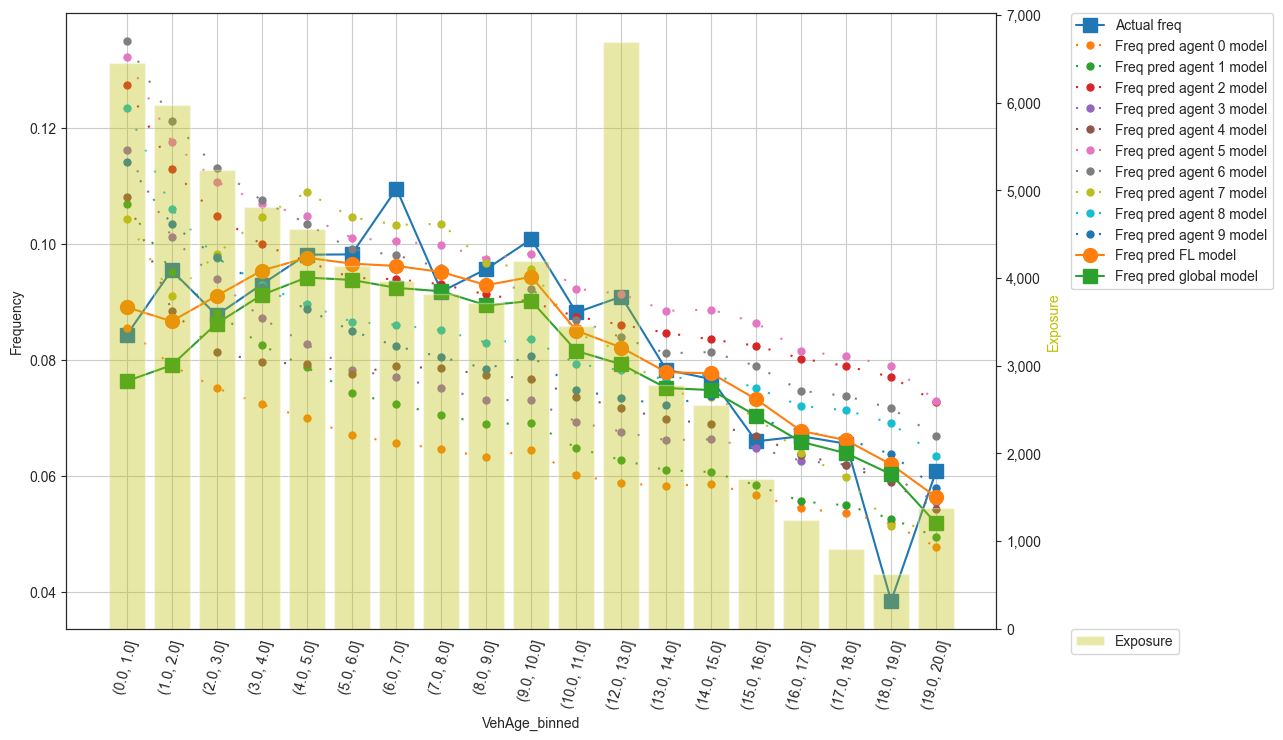

In [ ]:
one_way_graph_comparison('VehAge', NUM_AGENTS)

/var/folders/ch/ynbycfmj4cd7vcc24hv_f7fr0000gn/T/ipykernel_28806/3843640938.py:59: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(['{:,.0f}'.format(x) for x in vals])


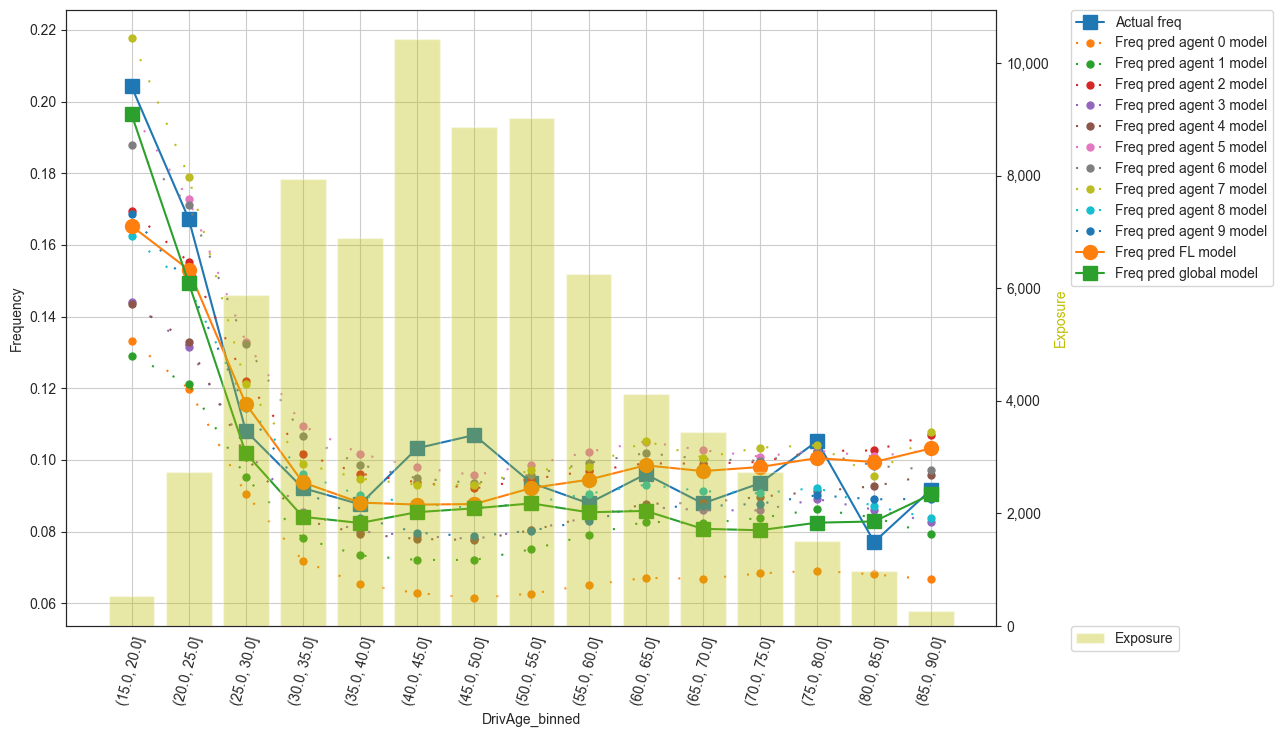

In [ ]:
one_way_graph_comparison('DrivAge', NUM_AGENTS)

/var/folders/ch/ynbycfmj4cd7vcc24hv_f7fr0000gn/T/ipykernel_28806/3843640938.py:59: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(['{:,.0f}'.format(x) for x in vals])


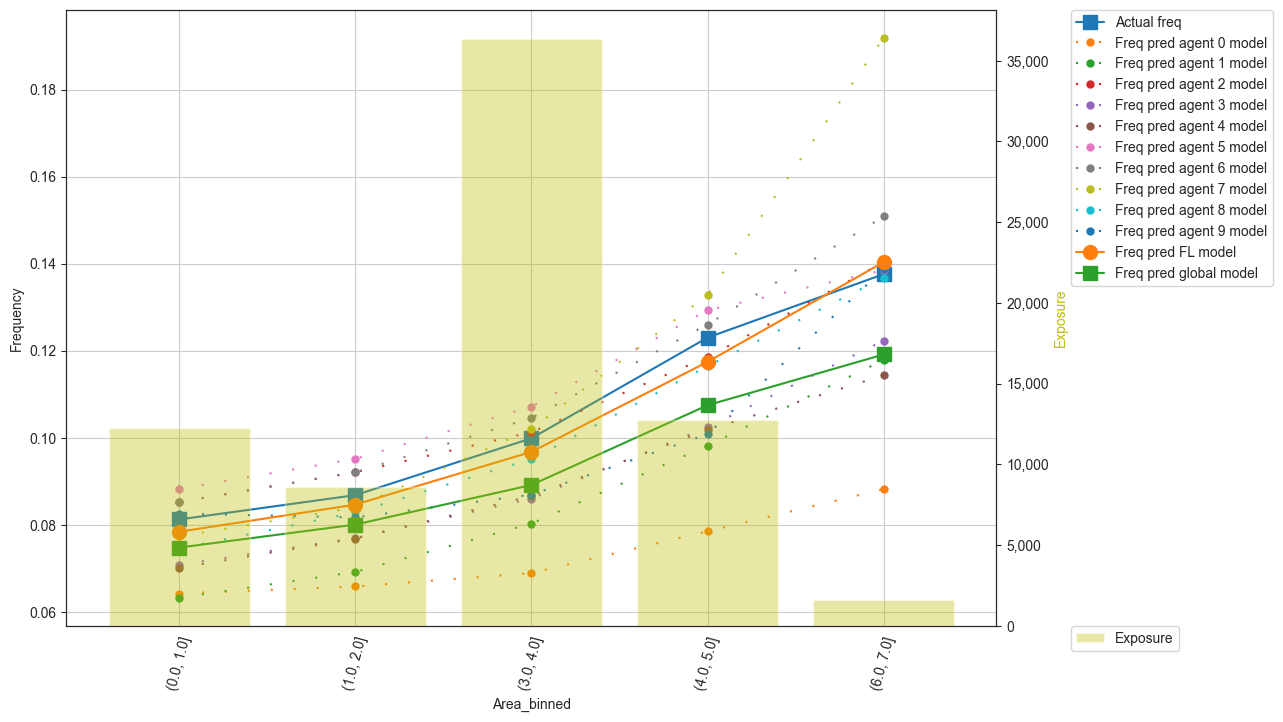

/var/folders/ch/ynbycfmj4cd7vcc24hv_f7fr0000gn/T/ipykernel_28806/3843640938.py:59: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(['{:,.0f}'.format(x) for x in vals])


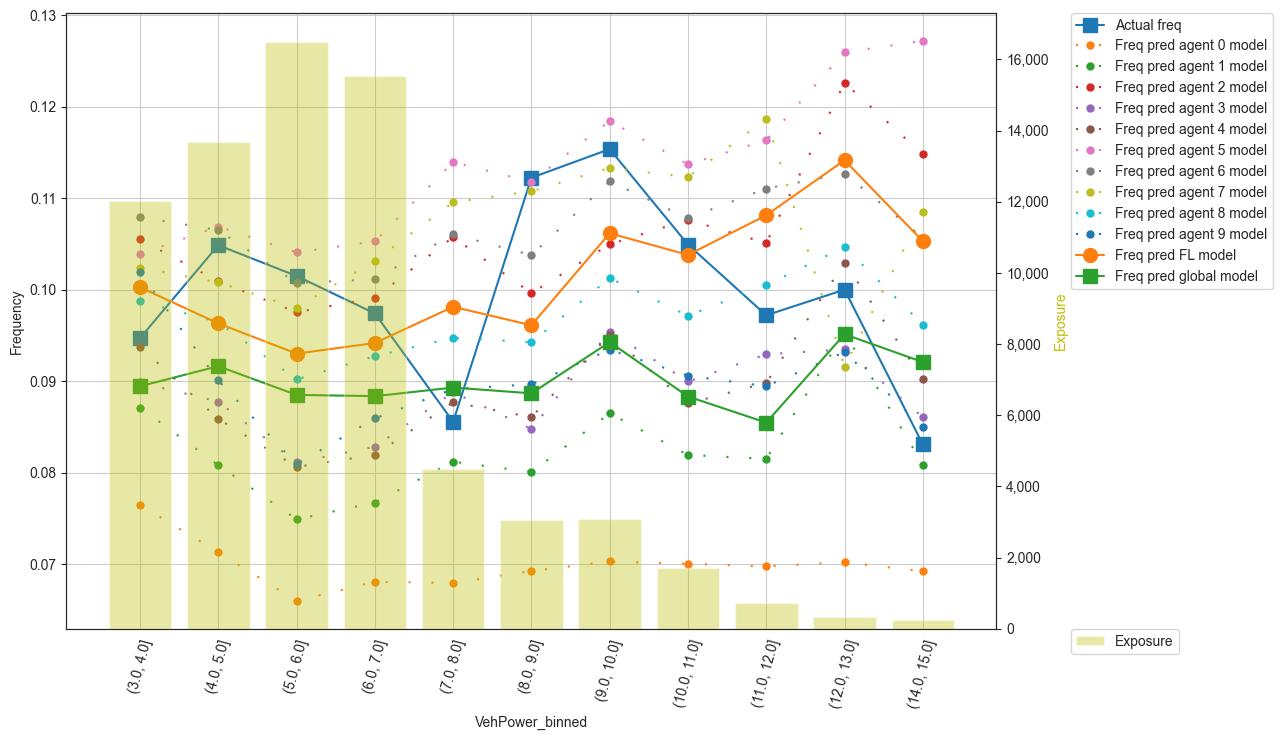

/var/folders/ch/ynbycfmj4cd7vcc24hv_f7fr0000gn/T/ipykernel_28806/3843640938.py:59: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(['{:,.0f}'.format(x) for x in vals])


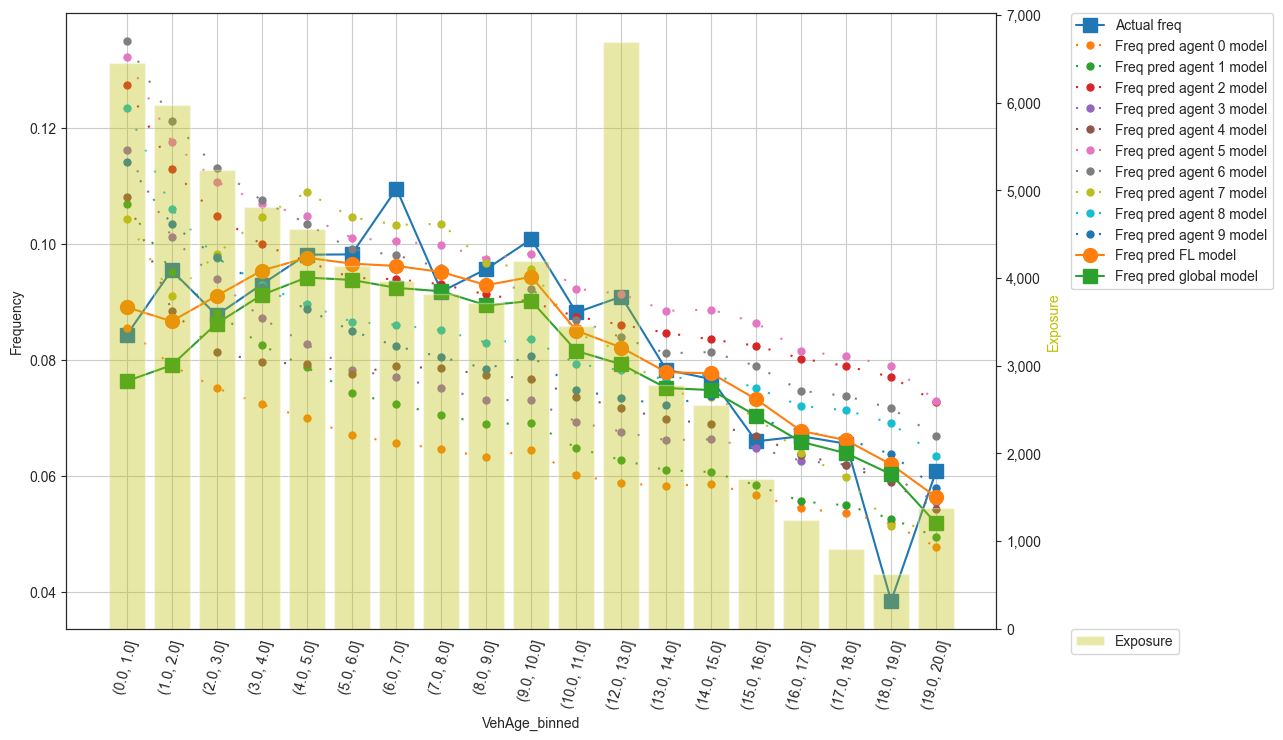

/var/folders/ch/ynbycfmj4cd7vcc24hv_f7fr0000gn/T/ipykernel_28806/3843640938.py:59: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(['{:,.0f}'.format(x) for x in vals])


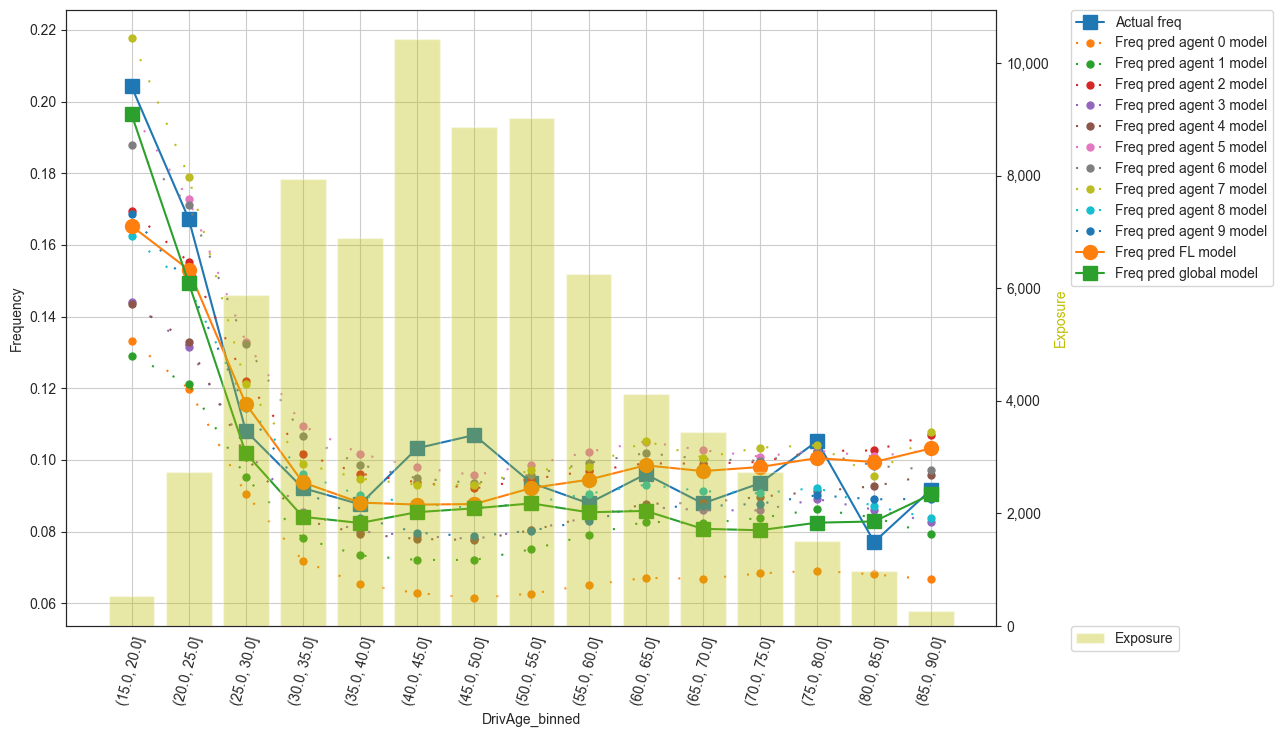

/var/folders/ch/ynbycfmj4cd7vcc24hv_f7fr0000gn/T/ipykernel_28806/3843640938.py:59: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(['{:,.0f}'.format(x) for x in vals])


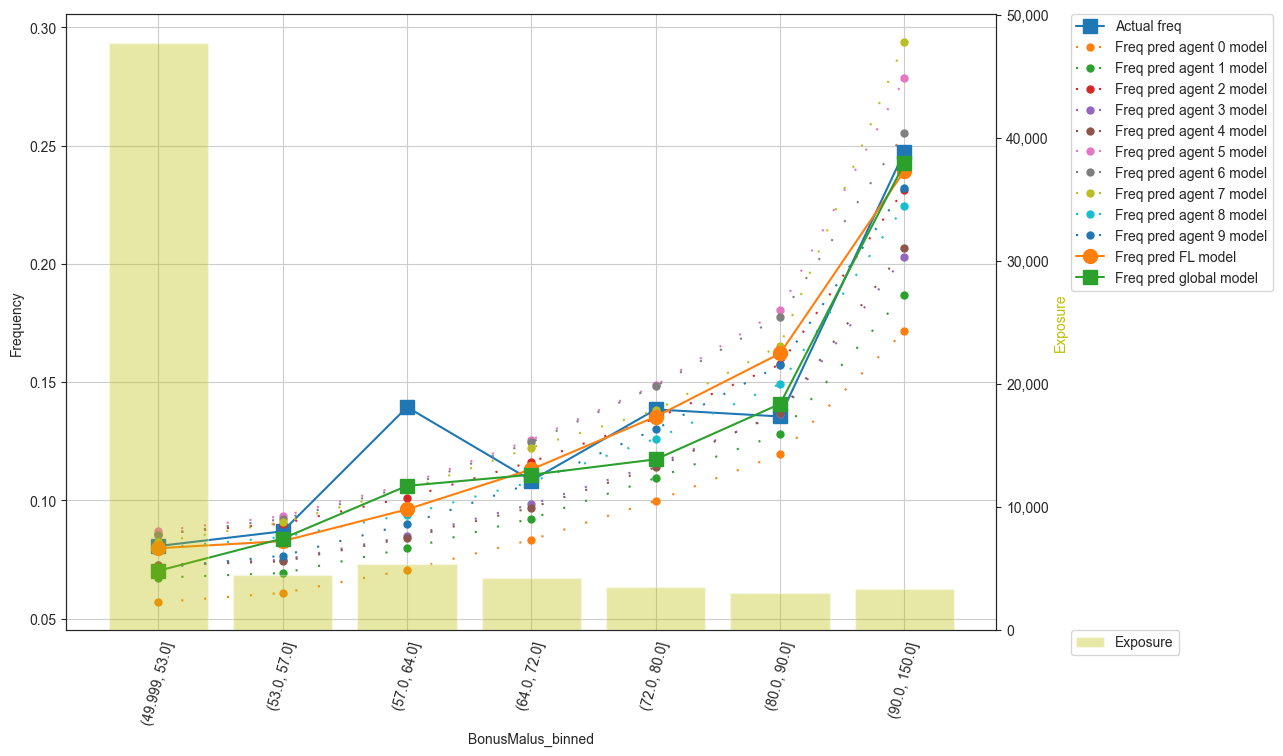

/var/folders/ch/ynbycfmj4cd7vcc24hv_f7fr0000gn/T/ipykernel_28806/3843640938.py:59: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(['{:,.0f}'.format(x) for x in vals])


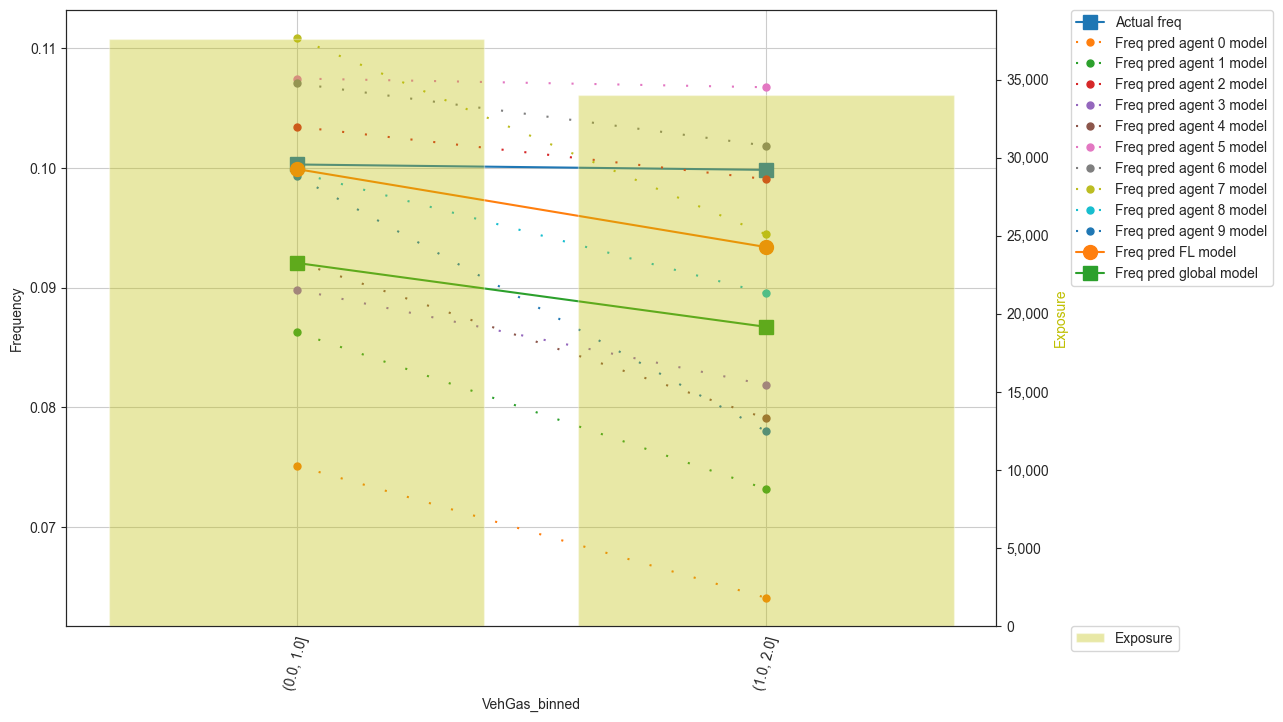

/var/folders/ch/ynbycfmj4cd7vcc24hv_f7fr0000gn/T/ipykernel_28806/3843640938.py:59: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(['{:,.0f}'.format(x) for x in vals])


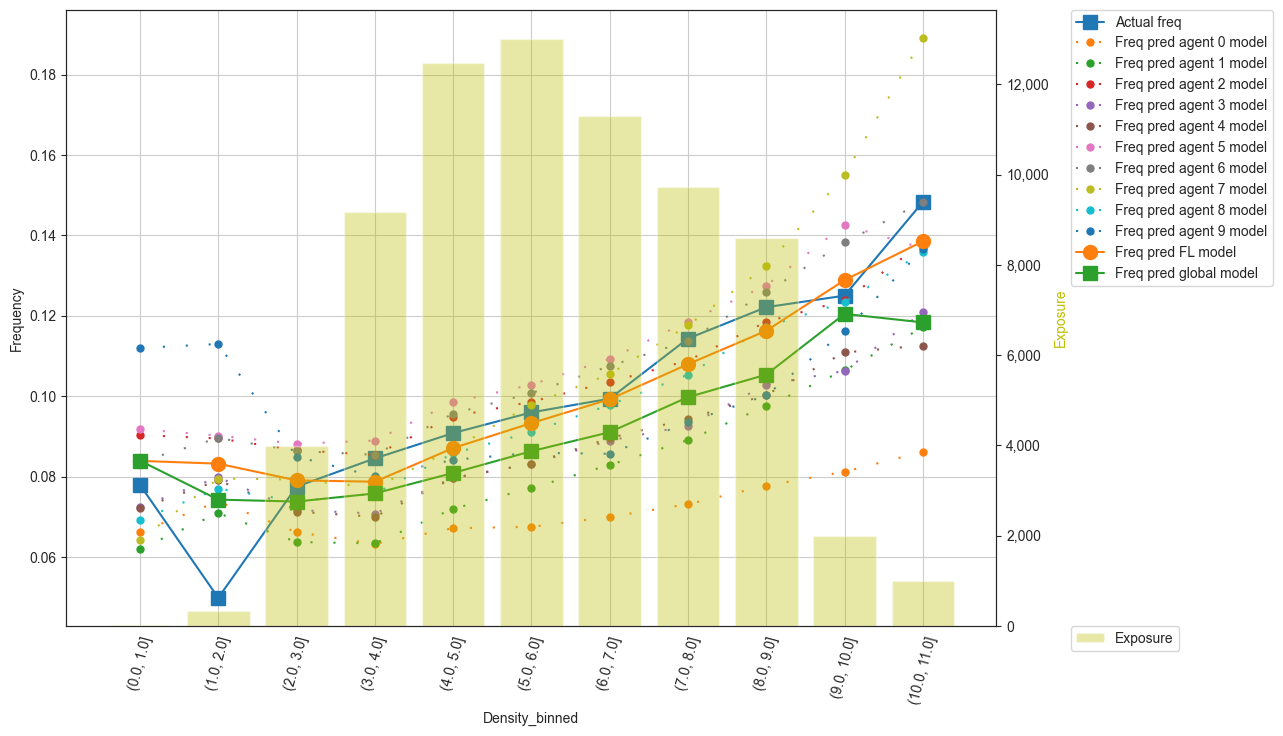

/var/folders/ch/ynbycfmj4cd7vcc24hv_f7fr0000gn/T/ipykernel_28806/3843640938.py:59: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(['{:,.0f}'.format(x) for x in vals])


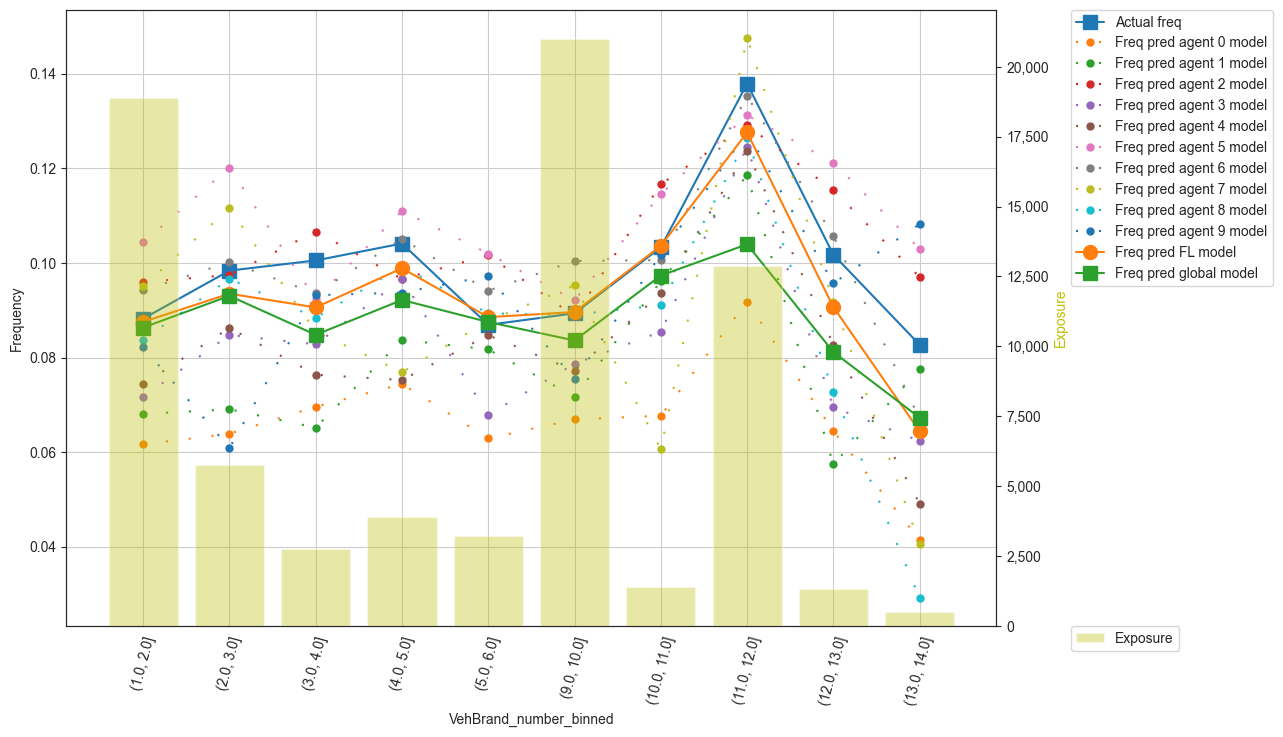

/var/folders/ch/ynbycfmj4cd7vcc24hv_f7fr0000gn/T/ipykernel_28806/3843640938.py:59: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(['{:,.0f}'.format(x) for x in vals])


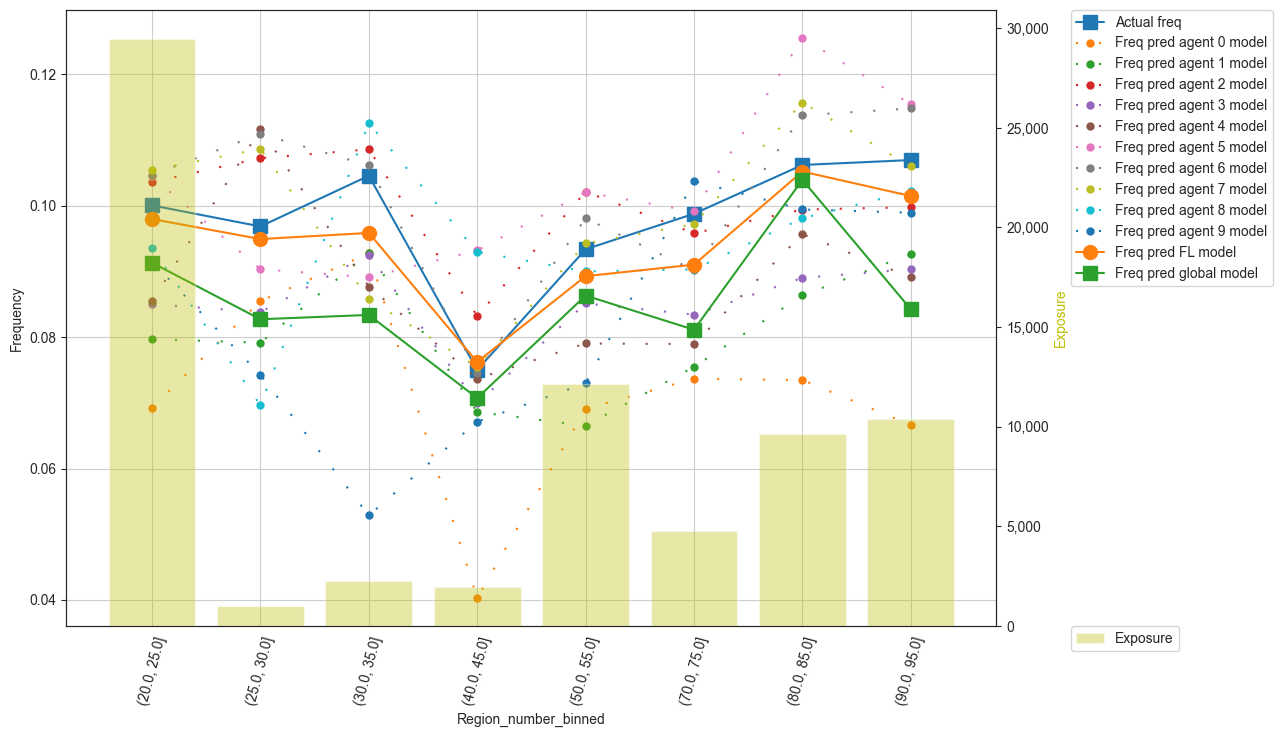

In [ ]:
for i in ['Area', 'VehPower', 'VehAge', 'DrivAge', 'BonusMalus', 'VehGas', 'Density', 'VehBrand_number', 'Region_number']:
    one_way_graph_comparison(i, NUM_AGENTS)

## Gini

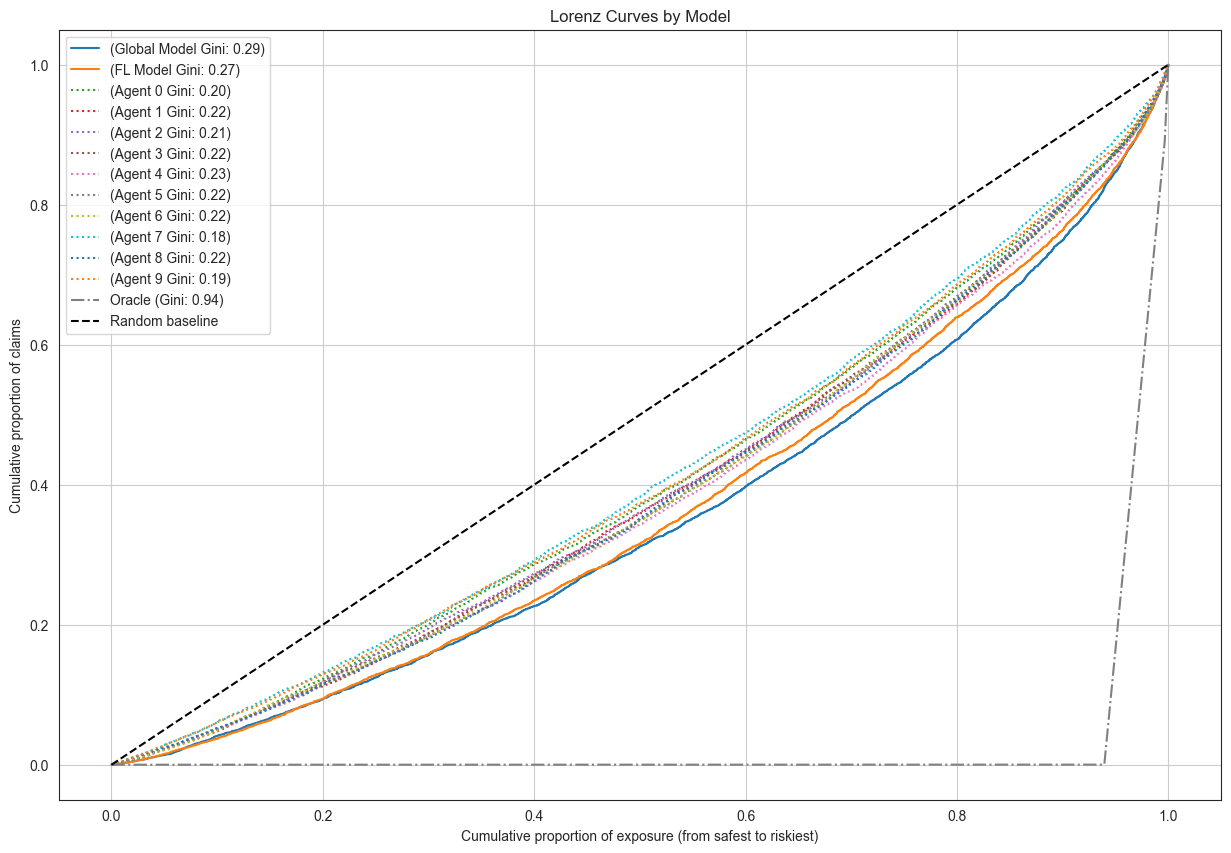

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))

cum_exposure, cum_claims = utils.lorenz_curve(
    df_test_pred['ClaimNb'], df_test_pred['ClaimNb_pred'], df_test_pred["Exposure"]
)
gini = 1 - 2 * auc(cum_exposure, cum_claims)
label = "(Global Model Gini: {:.2f})".format(gini)
ax.plot(cum_exposure, cum_claims, linestyle="-", label=label)

cum_exposure, cum_claims = utils.lorenz_curve(
    df_test_pred['ClaimNb'], df_test_pred['ClaimNb_fl_pred'], df_test_pred["Exposure"]
)
gini = 1 - 2 * auc(cum_exposure, cum_claims)
label = "(FL Model Gini: {:.2f})".format(gini)
ax.plot(cum_exposure, cum_claims, linestyle="-", label=label)

for agents in range(NUM_AGENTS):
    cum_exposure, cum_claims = utils.lorenz_curve(
        df_test_pred['ClaimNb'], df_test_pred['ClaimNb_agent_'+str(agents)+'_pred'], df_test_pred["Exposure"]
    )
    gini = 1 - 2 * auc(cum_exposure, cum_claims)
    label = '(Agent {} Gini: {:.2f})'.format(agents, gini)
    plt.plot(cum_exposure, cum_claims, linestyle="dotted", label=label)

# Oracle model: y_pred == y_test
cum_exposure, cum_claims = utils.lorenz_curve(
    df_test_pred['ClaimNb'], df_test_pred['ClaimNb'], df_test_pred["Exposure"]
)
gini = 1 - 2 * auc(cum_exposure, cum_claims)
label = "Oracle (Gini: {:.2f})".format(gini)
ax.plot(cum_exposure, cum_claims, linestyle="-.", color="gray", label=label)

# Random Baseline
ax.plot([0, 1], [0, 1], linestyle="--", color="black", label="Random baseline")
ax.set(
    title="Lorenz Curves by Model",
    xlabel="Cumulative proportion of exposure (from safest to riskiest)",
    ylabel="Cumulative proportion of claims",
)

plt.grid()
ax.legend(loc="upper left")

#plt.savefig(f'../ag_{ag}/' + 'lift_chart')

# Metric

In [ ]:
y_fl_tensor_pred = fl_model.predict(th.tensor(X_test).float())

In [ ]:
y_fl_pred=pd.Series(y_fl_tensor_pred.flatten().detach().numpy())

In [ ]:
y_fl_pred= df_test['ClaimNb_fl_pred']

In [ ]:
fl_weighted_pde = d2_tweedie_score(y_test, y_fl_pred, sample_weight=X_test[:, 0], power=1)
fl_weighted_pde 

0.047492126511583965

In [ ]:
weighted_pde_df = top_results_df[['agent', 'test_weighted_pde']]
weighted_pde_df

,agent,test_weighted_pde
0,-1,0.051515
60,0,0.006465
120,1,0.020588
180,2,0.028148
240,3,0.026081
300,4,0.030738
360,5,0.029986
420,6,0.031499
480,7,-0.060470
540,8,0.030467


In [ ]:
weighted_pde_df.loc[151] = [-2, d2_tweedie_score(y_test, y_fl_pred, sample_weight=X_test[:, 0], power=1)]
weighted_pde_df

/var/folders/ch/ynbycfmj4cd7vcc24hv_f7fr0000gn/T/ipykernel_28806/1077199988.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weighted_pde_df.loc[151] = [-2, d2_tweedie_score(y_test, y_fl_pred, sample_weight=X_test[:, 0], power=1)]


,agent,test_weighted_pde
0,-1.0,0.051515
60,0.0,0.006465
120,1.0,0.020588
180,2.0,0.028148
240,3.0,0.026081
300,4.0,0.030738
360,5.0,0.029986
420,6.0,0.031499
480,7.0,-0.060470
540,8.0,0.030467


In [ ]:
weighted_pde_df['fl_relative_increase'] = fl_weighted_pde/weighted_pde_df['test_weighted_pde']
weighted_pde_df

/var/folders/ch/ynbycfmj4cd7vcc24hv_f7fr0000gn/T/ipykernel_28806/2101612733.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weighted_pde_df['fl_relative_increase'] = fl_weighted_pde/weighted_pde_df['test_weighted_pde']


,agent,test_weighted_pde,fl_relative_increase
0,-1.0,0.051515,0.921914
60,0.0,0.006465,7.345662
120,1.0,0.020588,2.306799
180,2.0,0.028148,1.687213
240,3.0,0.026081,1.820916
300,4.0,0.030738,1.545062
360,5.0,0.029986,1.583790
420,6.0,0.031499,1.507746
480,7.0,-0.060470,-0.785383
540,8.0,0.030467,1.558806


/var/folders/ch/ynbycfmj4cd7vcc24hv_f7fr0000gn/T/ipykernel_28806/1302985099.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weighted_pde_df['agent'] = weighted_pde_df['agent'].replace({-2: 'Federated Model', -1: 'Global Model'})


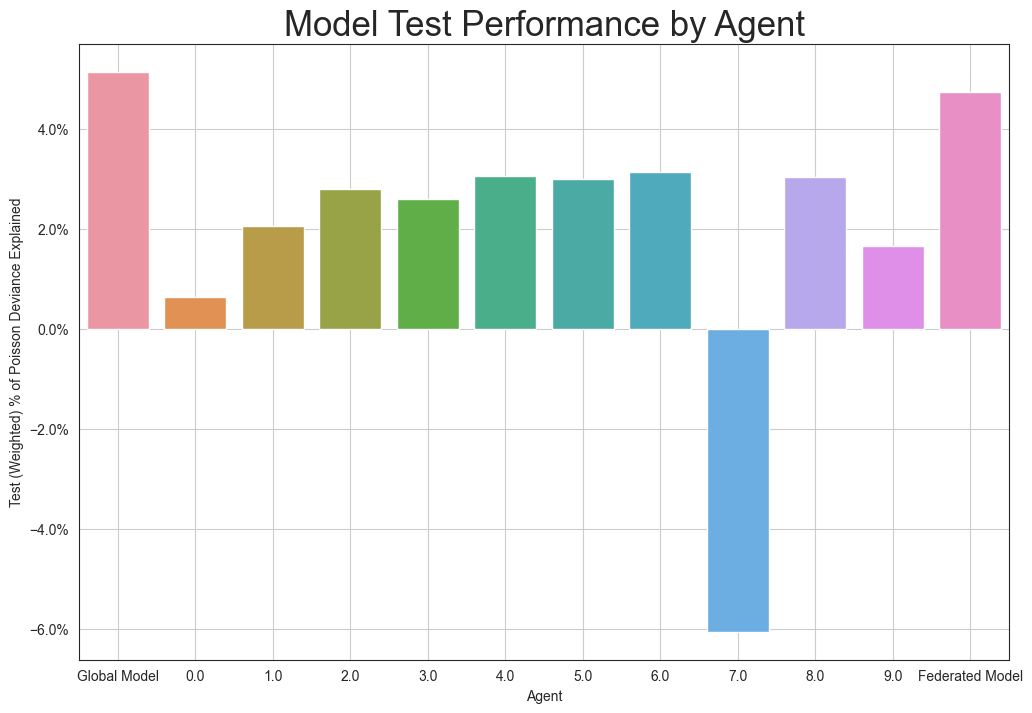

In [ ]:
weighted_pde_df['agent'] = weighted_pde_df['agent'].replace({-2: 'Federated Model', -1: 'Global Model'})

fig, ax = plt.subplots(figsize=(12,8))

sns.set_style('white')

ax=sns.barplot(x='agent', y='test_weighted_pde',
               data=weighted_pde_df[['agent', 'test_weighted_pde']])
plt.title('Model Test Performance by Agent', fontsize=25)

plt.xticks(fontsize=10)
plt.ylabel('Test (Weighted) % of Poisson Deviance Explained', fontsize=10)
plt.xlabel('Agent', fontsize=10)
plt.yticks(fontsize=10)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax.grid(True)
plt.show()

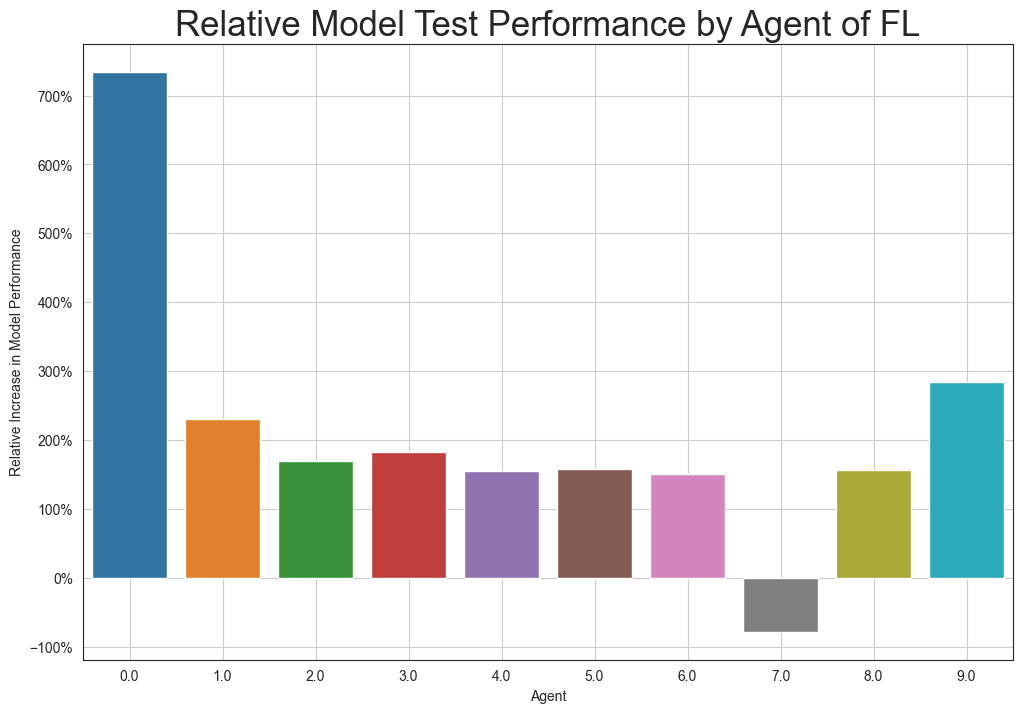

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))

sns.set_style('white')

ax=sns.barplot(x='agent', y='fl_relative_increase',
               data=weighted_pde_df[~weighted_pde_df.agent.isin(['Global Model', 'Federated Model'])])


plt.title('Relative Model Test Performance by Agent of FL', fontsize=25)

plt.xticks(fontsize=10)
plt.ylabel('Relative Increase in Model Performance', fontsize=10)
plt.xlabel('Agent', fontsize=10)
plt.yticks(fontsize=10)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax.grid(True)
plt.show()

# End